In [74]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skluc.main.utils import logger


pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

flatten = lambda l: [item for sublist in l for item in sublist]

In [2]:
FILENAME = "gathered_results.csv"
DIRNAME = "/home/luc/Resultats/Deepstrom/september_2018/few_shot_tests_big_subsample"
filepath = os.path.join(DIRNAME, FILENAME)

In [119]:
min_acc = 0.6
max_acc = 1.0
linewidth = 0.9

real_nys_marker = "s"

learned_nys_marker = "x"

dense_marker = "v"
dense_color = "r"

deepfried_marker = "8"
deepfried_color = "b"

d_translate_kernel = {
    "linear": "Linear",
    "chi2_cpd": "Chi2",
    "rbf": "Gaussian",
}

In [19]:
df_root = pd.read_csv(filepath)
df_root

accuracy          time  --chi-square-PD-kernel  --chi-square-kernel --classification-method   --cut-layer  --distance  --dropout  --exp-chi-square-kernel --gamma  --laplacian-kernel  --linear-kernel --nb-class-val  --nb-neighbour --nb-stack  --non-linear                    --non-linearity  --num-class-ep-test  --num-class-ep-train  --num-episode-test  --num-episode-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim  --quiet  --rbf-kernel  --real-nystrom  --seed  deepfriedconvnet  deepstrom  dense    kernel    network
0   0.889487   6247.928010                   False                False                      lc  activation_4         NaN        1.0                    False    None               False             True           None               0       None         False  <function relu at 0x7fc210e67488>                   20                    60                1000                10000          300              15              5        1024        256    False         False           False       0             False       True  False    linear  deepstrom
1   0.878407   5968.981208                   False                False                      lc  activation_4         NaN        1.0                    False    None               False             True           None               0       None         False  <function relu at 0x7f5340fe7488>                   20                    60                1000                10000          300              15              5         512        128    False         False           False       0             False       True  False    linear  deepstrom
2   0.877100   6514.381647                   False                False                      lc  activation_4         NaN        1.0                    False    None               False             True           None               0       None          True  <function relu at 0x7f5c48967488>                   20                    60                1000                10000          300              15              5        1024         64    False         False           False       0             False       True  False    linear  deepstrom
3   0.848140   9055.739273                   False                False                      lc  activation_4         NaN        1.0                    False    None               False             True           None               0       None         False  <function relu at 0x7f2c57b67488>                   20                    60                1000                10000          300              15              5         256         64    False         False           False       0             False       True  False    linear  deepstrom
4   0.861310  22025.393994                   False                 True                      lc  activation_4         NaN        1.0                    False    None               False            False           None               0       None          True  <function relu at 0x7f840e5e7488>                   20                    60                1000                10000          300              15              5         512         16    False         False           False       0             False       True  False  chi2_cpd  deepstrom
5   0.856387   9260.235286                   False                False                      lc  activation_4         NaN        1.0                    False    None               False             True           None               0       None          True  <function relu at 0x7f45585e7488>                   20                    60                1000                10000          300              15              5         512         64    False         False           False       0             False       True  False    linear  deepstrom
6   0.884167   6118.164460                   False                False                      lc  activation_4         NaN        1.0                    False    

In [18]:
df = df_root.loc[:, ["accuracy", "time", "--non-linear", "--num-class-ep-test", "--num-class-ep-train", "--num-epoch", "--num-query-ex", "--num-supp-ex", "--nys-size", "--out-dim", "kernel", "network"]]
df.head()

accuracy          time  --non-linear  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim    kernel    network
0  0.889487   6247.928010         False                   20                    60          300              15              5        1024        256    linear  deepstrom
1  0.878407   5968.981208         False                   20                    60          300              15              5         512        128    linear  deepstrom
2  0.877100   6514.381647          True                   20                    60          300              15              5        1024         64    linear  deepstrom
3  0.848140   9055.739273         False                   20                    60          300              15              5         256         64    linear  deepstrom
4  0.861310  22025.393994          True                   20                    60          300              15              5         512         16  chi2_cpd  deepstrom

In [38]:
df.sort_values(by="accuracy", ascending=False).head()

accuracy         time  --non-linear  --num-class-ep-test  --num-class-ep-train  --num-epoch  --num-query-ex  --num-supp-ex  --nys-size  --out-dim  kernel    network
35  0.890853  6428.212467          True                   20                    60          300              15              5        1024        256  linear  deepstrom
0   0.889487  6247.928010         False                   20                    60          300              15              5        1024        256  linear  deepstrom
53  0.888037  6053.270988         False                   20                    60          300              15              5         512        256  linear  deepstrom
32  0.885393   605.226391          True                   20                    60          300              15              5        1024          0  linear  deepstrom
27  0.884263  9118.107676          True                   20                    60          300              15              5         512        256  linear  deepstrom

In [30]:
kernel_names = set(df["kernel"].values)
logger.debug("Kernel functions are: {}".format(kernel_names))

non_linearities = set(df["--non-linear"])
logger.debug("non_linearities: {}".format(non_linearities))

nystrom_sizes = set(df["--nys-size"])
logger.debug(f"Nystrom sizes: {nystrom_sizes}")

output_dims = set(df["--out-dim"])
logger.debug(f"Output dimension: {output_dims}")

2018-09-24 09:50:53,387 [13536] DEBUG    root: Kernel functions are: {'linear', 'chi2_cpd'}
2018-09-24 09:50:53,390 [13536] DEBUG    root: non_linearities: {False, True}
2018-09-24 09:50:53,391 [13536] DEBUG    root: Nystrom sizes: {1024, 512, 256}
2018-09-24 09:50:53,393 [13536] DEBUG    root: Output dimension: {256, 64, 128, 0, 16}


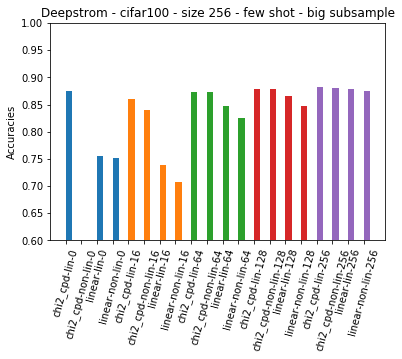

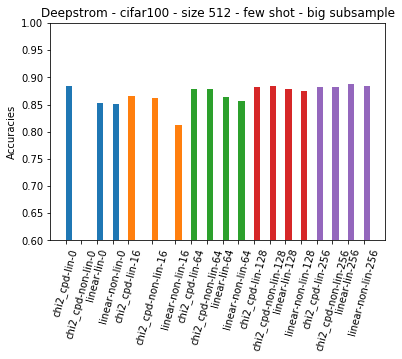

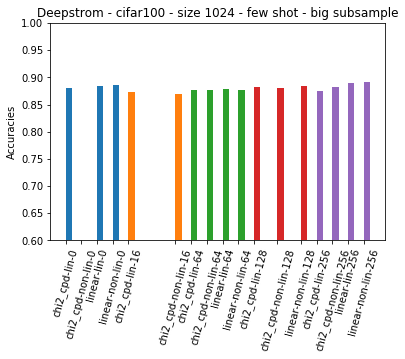

In [125]:
step_between_groups = 0.25
group_size = 2
step_inside_groups = 0.15
bar_width = 0.2


for idx_plot, n_size in enumerate(sorted(nystrom_sizes)):
    fig, axs = plt.subplots()
    df_n_size = df[df["--nys-size"] == n_size]
    group_of_bins = []
    group_of_bins_labels = []
    for o_dim in sorted(output_dims):
        df_o_dim = df_n_size[df_n_size["--out-dim"] == o_dim]
        
        current_group_of_bins = []
        current_group_of_bins_labels = []
        for k_name in sorted(kernel_names):
            df_k_name = df_o_dim[df_o_dim["kernel"] == k_name]
            for n_lin in sorted(non_linearities):
                try:
                    df_n_lin = df_k_name[df_k_name["--non-linear"] == n_lin]
                    current_group_of_bins.append(df_n_lin["accuracy"].values[0])
                    current_group_of_bins_labels.append(f"{k_name}-{'non-lin' if n_lin else 'lin'}-{o_dim}")
                except:
                    pass
        
        group_of_bins.append(current_group_of_bins)
        group_of_bins_labels.append(current_group_of_bins_labels)
    
    x_locations_total = []
    x_labels_total = []
    for i, group in enumerate(group_of_bins):
        x_locations = np.linspace(start=i*(group_size) + step_between_groups, stop=(i+1)*(group_size) - step_between_groups, num=len(group))
        x_locations_total.extend(list(x_locations))
        x_labels_total.extend(list(group_of_bins_labels[i]))
        axs.bar(x_locations, 
                group,
                width=bar_width,
                align="edge")
    axs.set_ylim(min_acc, max_acc)        
    axs.set_ylabel('Accuracies')
    axs.set_title(f'Deepstrom - cifar100 - size {n_size} - few shot - big subsample')
#     base_out_dir = os.path.join(os.path.abspath(__file__.split(".")[0]), "images")
#     out_name = "acc_param_{}_{}_{}".format(k_name, wafter, multiview_method)

#     pathlib.Path(out_dir_cut_layer).mkdir(parents=True, exist_ok=True)
#     out_path = os.path.join(out_dir_cut_layer, out_name)
#     logger.debug(out_path)
#     f.savefig(out_path)

    plt.xticks(x_locations_total, x_labels_total, rotation=75)
    plt.show()
# plt.xticks(index + bar_width / 2)
# ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
# ax.legend()
# plt.bar(np.arange(4), np.random.rand(4))